## Import Libraries

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Exploratory Data Analysis (EDA)

In [2]:
# Read the data set
gold_df = pd.read_csv('gld_price_data.csv')
gold_df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [3]:
# Drop date column
gold_df_1 = gold_df.drop(columns=['Date'])

In [4]:
# Shape of the dataset
gold_df.shape

(2290, 6)

In [5]:
# Data type information
gold_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


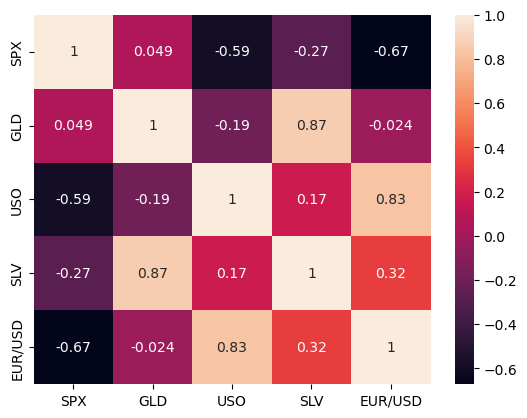

In [6]:
# Plot the heatmap
sns.heatmap(gold_df_1.corr(), annot=True)
plt.show()

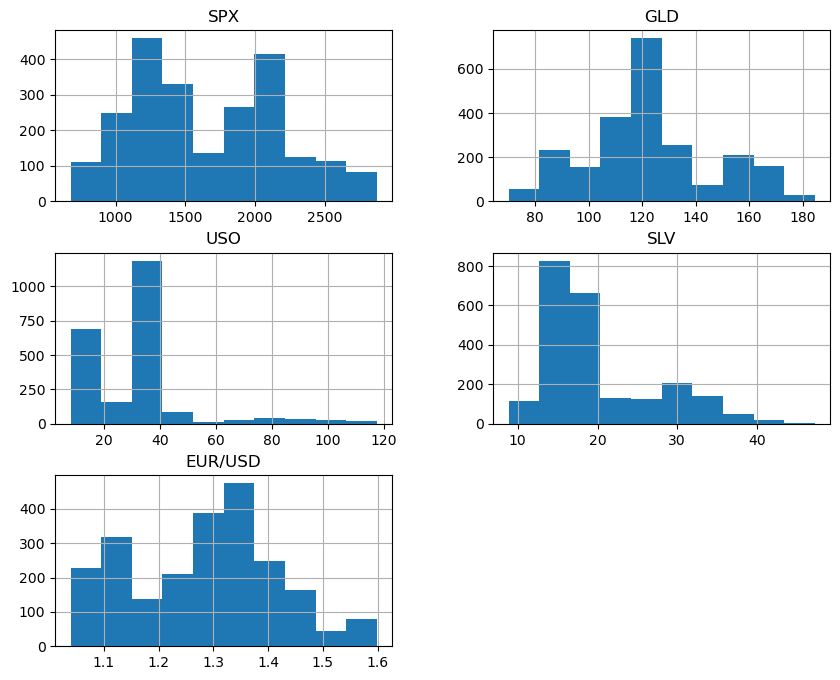

In [7]:
# Plot histograms for all columns (hist will ignore non-numeric by default)
gold_df.hist(figsize=(10,8))
plt.show()

## Feature Engineering 

In [8]:
# Finding null values
gold_df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
# Statistical measures of the data
gold_df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


<Axes: xlabel='GLD', ylabel='Density'>

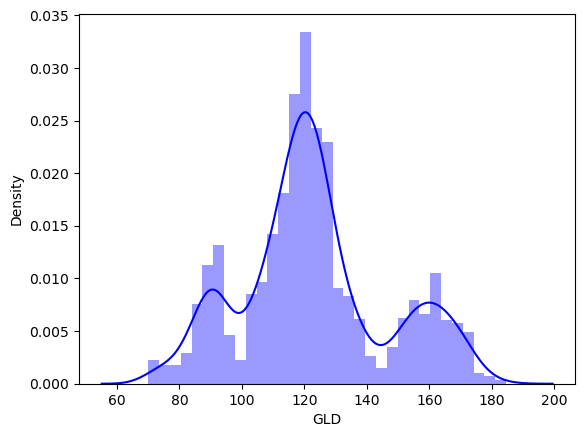

In [10]:
# Cheking the distribution of the gold price
sns.distplot(gold_df['GLD'], color='Blue')

## Feature Selection_1

In [11]:
# Random Forest Regressor categorical and response variable
X = gold_df.drop(['Date', 'GLD'], axis=1)
Y = gold_df['GLD']

In [12]:
# Categorical variables
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [13]:
# Response Variable
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


## Model selection_1 : Random Forest Regressor

In [14]:
# Test train split 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size =0.2, random_state=42)

In [38]:
#from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(
    n_estimators=100,
    max_depth=8,              # limit depth of trees
    min_samples_split=10,     # require more samples to split
    min_samples_leaf=7,       # require more samples in each leaf
    random_state=42
)

regressor.fit(X_train, Y_train)


RandomForestRegressor(max_depth=8, min_samples_leaf=7, min_samples_split=10,
                      random_state=42)

In [39]:
# Training the Random Forest model
train_predictions_rfr = regressor.predict(X_train)
print(train_predictions_rfr)

[158.56504911 120.85379586  94.60750052 ... 149.20170312 120.50637795
 166.54538561]


In [40]:
# R squarred error in Random Forest train data
train_score = metrics.r2_score(Y_train, train_predictions_rfr)
print("R squarred training error:", train_score)

R squarred training error: 0.9916183228280142


In [41]:
# Prediction on the Random Forest test data
test_predictions_rfr = regressor.predict(X_test)

In [42]:
# Print of the Random Forest test data
print(test_predictions_rfr)

[121.6959742  132.43867833 127.50594438  96.00802175 119.09846186
 115.41314134 125.20897133 118.16880619 108.04915727 100.19597633
  92.82253115 166.5582806  145.51612166 115.5610242  170.10504196
  84.29735992 124.2456937  114.04950504 113.34310068 132.18696659
 124.40392144 112.8884223  115.49458847 107.94167615 108.12114379
 126.09587436 117.46561987 112.75956854 114.03014582 124.62433907
 146.16415177  89.47171266 166.52160587 113.92676034 107.82929694
 120.67658453 140.77132741 161.07502146 173.28797636 153.53671851
 119.21591291 113.14261162 121.30492284 115.27954648 121.61324184
 108.01446203  88.21615227 113.48444506 130.38962338 118.64119561
 105.15110206 130.38962338 107.35107875 161.25582437 132.3341989
 120.36910026 147.43688949 137.43332892  95.30629276 125.42501578
 113.97638947  86.0099978  104.49853228 113.92808883  83.94965717
 121.74407291 117.38445154 115.3560534  164.87671978  91.87304628
  79.20722365 160.8171669  155.51741415 106.20310209 145.76572003
 109.753585

In [43]:
# R squarred error in Random Forest test data
error_score = metrics.r2_score(Y_test, test_predictions_rfr)
print("R squarred error:", error_score)

R squarred error: 0.9871109188286642


In [44]:

#Y_test=list(Y_test)


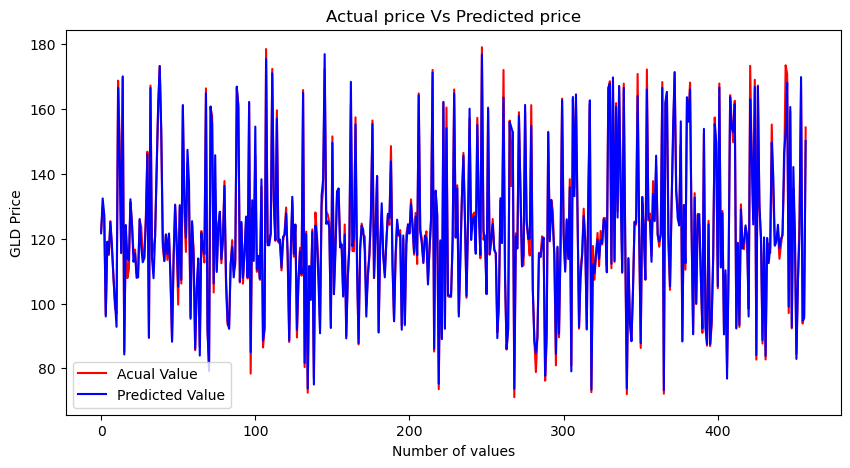

In [46]:
# Plotting the difference between actual and predicted value
Y_test=list(Y_test)
plt.figure(figsize=(10, 5))
plt.plot(Y_test, color='Red', label ='Acual Value')
plt.plot(test_predictions_rfr, color='blue', label='Predicted Value')
plt.title('Actual price Vs Predicted price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

## Feature Selection_2 

In [47]:
# Define features and target where feature = x and target = y 
X = gold_df.drop(['Date', 'GLD'], axis=1)
Y = gold_df['GLD']

In [48]:
# Categorical variables
X.head()

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.180,1.471692
1,1447.160034,78.370003,15.285,1.474491
2,1411.630005,77.309998,15.167,1.475492
3,1416.180054,75.500000,15.053,1.468299
4,1390.189941,76.059998,15.590,1.557099


In [49]:
Y.head()

0    84.860001
1    85.570000
2    85.129997
3    84.769997
4    86.779999
Name: GLD, dtype: float64

## Model selection_2 : Gradient Boosting Algorithm

In [50]:
# Train-test split for Gradient Boosting 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [76]:
# Step 3: Initialize and train the model
gbr = GradientBoostingRegressor(
    n_estimators=50,
    learning_rate=0.07,
    max_depth=7,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42
)
gbr.fit(X_train, Y_train)

GradientBoostingRegressor(learning_rate=0.07, max_depth=7, min_samples_leaf=10,
                          min_samples_split=20, n_estimators=50,
                          random_state=42)

In [77]:
# Training prediction for Gradient Boost
train_predictions_gbr = gbr.predict(X_train)
print(train_predictions_gbr)

[159.70435331 121.03693796  94.90642605 ... 150.6164943  120.16372794
 166.52971298]


In [78]:
# R squarred error in Gradient Boost train data
train_r2 = r2_score(Y_train, train_predictions_gbr)
print("Gradient Boosting R² on training data:", train_r2)

Gradient Boosting R² on training data: 0.9962158061561086


In [79]:
# Prediction on the Gradient Boost test data
test_predictions_gbr = gbr.predict(X_test)
print(test_predictions_gbr)

[122.52068484 130.35869094 127.09266895  97.01013007 118.95186587
 115.87523466 125.23158512 117.89338034 108.26811685  98.89743059
  96.32169583 165.74314368 147.83585147 117.16997591 168.79041302
  84.38116974 123.7853163  109.44036143 113.75240173 130.92368377
 123.84405252 113.24787143 117.01295124 109.02107452 109.27951184
 125.85736755 117.58729864 112.85156586 113.05482994 124.10769242
 145.23654262  90.52899762 166.5100675  114.01194546 108.92140019
 120.58217017 141.10372715 160.37044921 172.41462581 152.68093542
 119.51354689 113.66440583 121.77527739 114.76321496 122.08474209
 108.03645755  88.87806946 113.82182252 129.75874873 118.11569893
 104.7903757  129.75874873 107.99645481 159.51174769 130.92534542
 119.49240623 146.10114137 138.70138175  95.7240609  124.83018682
 113.90372963  87.4794343  104.51139579 114.62782155  85.41422773
 122.59854747 116.90654737 114.7722202  164.56436169  93.20435984
  81.79283076 160.19188501 156.97537861 106.89415113 148.92918082
 109.97226

In [80]:
# R squarred error in Gradient Boost test data
test_r2 = r2_score(Y_test, test_predictions_gbr)
print("Gradient Boosting R² on test data:", test_r2)

Gradient Boosting R² on test data: 0.9863582460230143


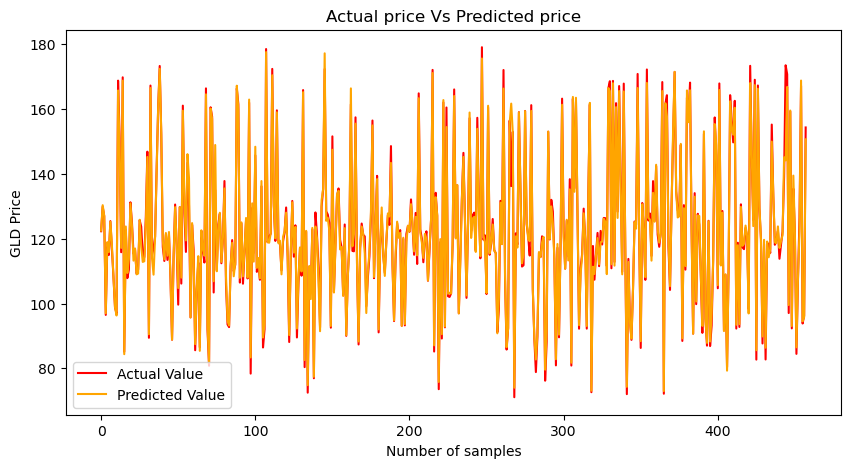

In [81]:
# Convert both to Series and reset index
Y_test_series = pd.Series(Y_test).reset_index(drop=True)
test_predictions_series = pd.Series(test_predictions_gbr)

plt.figure(figsize=(10, 5))
plt.plot(Y_test_series, color='red', label='Actual Value')
plt.plot(test_predictions_series, color='orange', label='Predicted Value')
plt.title('Actual price Vs Predicted price')
plt.xlabel('Number of samples')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

## Model Comparison

In [82]:
print("🔹 Dataset Sizes Used for Both Models")

# Feature sets
print("X_train shape:", X_train.shape)  # (rows, columns)
print("X_test shape :", X_test.shape)

# Target sets
print("Y_train length:", len(Y_train))
print("Y_test length :", len(Y_test))

# Prediction lengths
print("\n🔹 Prediction Output Sizes")
print("Random Forest predictions:", len(test_predictions_rfr))
print("Gradient Boosting predictions:", len(test_predictions_gbr))


🔹 Dataset Sizes Used for Both Models
X_train shape: (1832, 4)
X_test shape : (458, 4)
Y_train length: 1832
Y_test length : 458

🔹 Prediction Output Sizes
Random Forest predictions: 458
Gradient Boosting predictions: 458


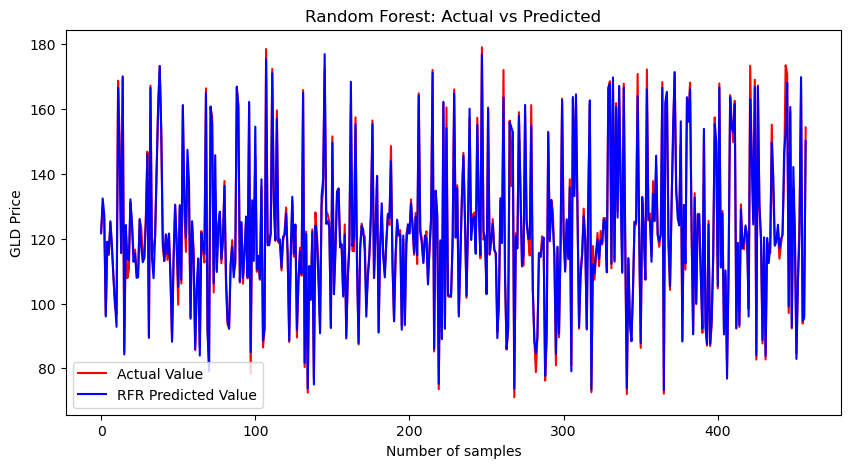

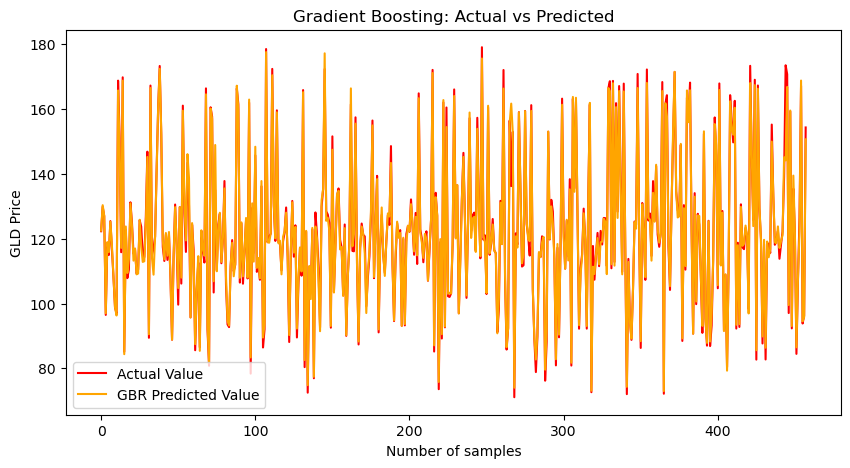

In [83]:
# Ensure same Y_test and test predictions are used
Y_test_series = pd.Series(Y_test).reset_index(drop=True)

# For Random Forest
plt.figure(figsize=(10, 5))
plt.plot(Y_test_series, color='red', label='Actual Value')
plt.plot(pd.Series(test_predictions_rfr), color='blue', label='RFR Predicted Value')
plt.title('Random Forest: Actual vs Predicted')
plt.xlabel('Number of samples')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

# For Gradient Boosting
plt.figure(figsize=(10, 5))
plt.plot(Y_test_series, color='red', label='Actual Value')
plt.plot(pd.Series(test_predictions_gbr), color='orange', label='GBR Predicted Value')
plt.title('Gradient Boosting: Actual vs Predicted')
plt.xlabel('Number of samples')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

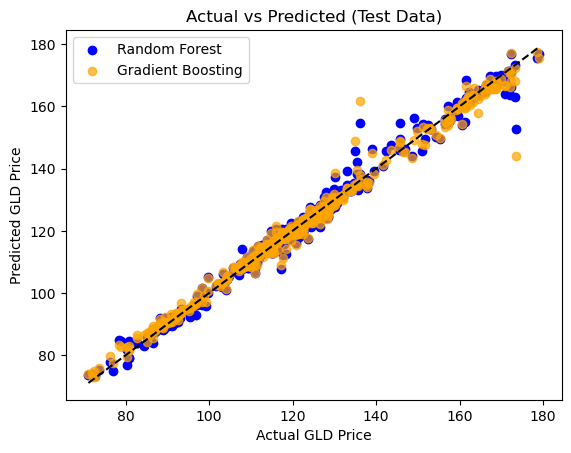

In [84]:
# Test data actual vs prediction 
rf_preds = pd.Series(test_predictions_rfr).reset_index(drop=True)
gbr_preds = pd.Series(test_predictions_gbr).reset_index(drop=True)

# Plot the test data actual vs prediction
plt.scatter(Y_test, test_predictions_rfr, color='blue', label='Random Forest')
plt.scatter(Y_test, test_predictions_gbr, color='orange', label='Gradient Boosting', alpha=0.7)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], 'k--')  # perfect line
plt.xlabel('Actual GLD Price')
plt.ylabel('Predicted GLD Price')
plt.title('Actual vs Predicted (Test Data)')
plt.legend()
plt.show()

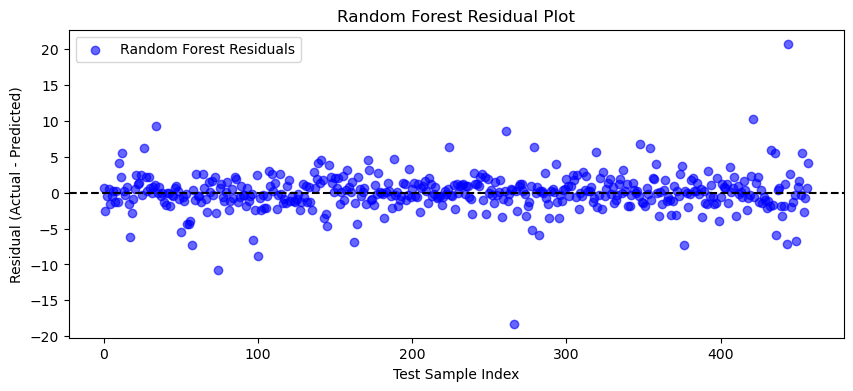

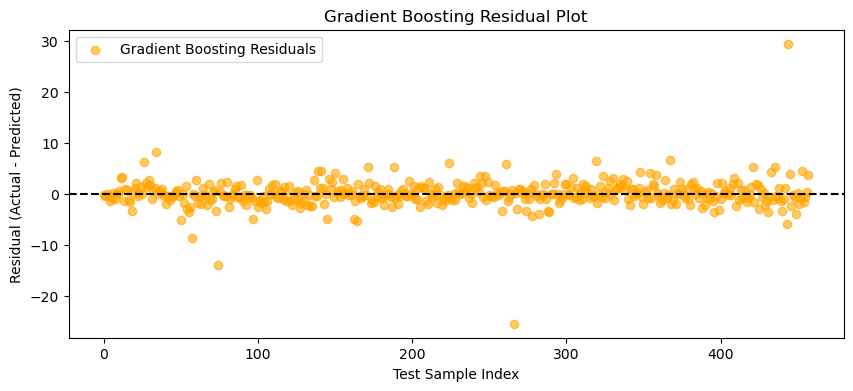

In [85]:
# Calculate residuals
#Y_test_series = pd.Series(Y_test).reset_index(drop=True)
rf_residuals = Y_test_series - rf_preds
gbr_residuals = Y_test_series - gbr_preds

# Plot residuals for Random Forest
plt.figure(figsize=(10, 4))
plt.scatter(range(len(rf_residuals)), rf_residuals, color='blue', label='Random Forest Residuals', alpha=0.6)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Random Forest Residual Plot')
plt.xlabel('Test Sample Index')
plt.ylabel('Residual (Actual - Predicted)')
plt.legend()
plt.show()

# Plot residuals for Gradient Boosting
plt.figure(figsize=(10, 4))
plt.scatter(range(len(gbr_residuals)), gbr_residuals, color='orange', label='Gradient Boosting Residuals', alpha=0.6)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Gradient Boosting Residual Plot')
plt.xlabel('Test Sample Index')
plt.ylabel('Residual (Actual - Predicted)')
plt.legend()
plt.show()

In [86]:
# Check if the residuals are equal or not
print("Are residuals equal?", (rf_residuals == gbr_residuals).all())

Are residuals equal? False


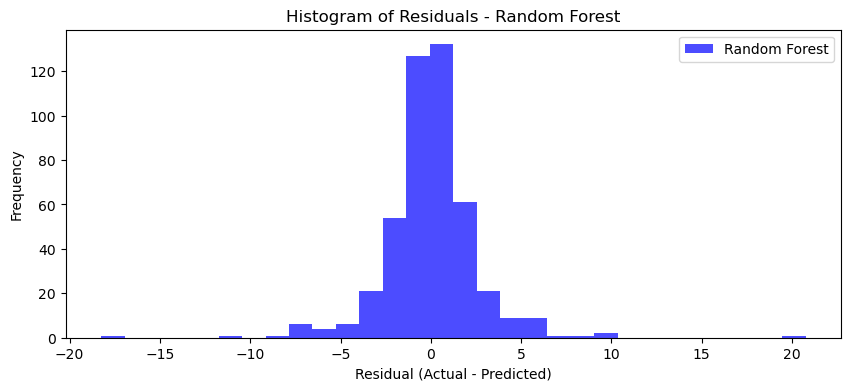

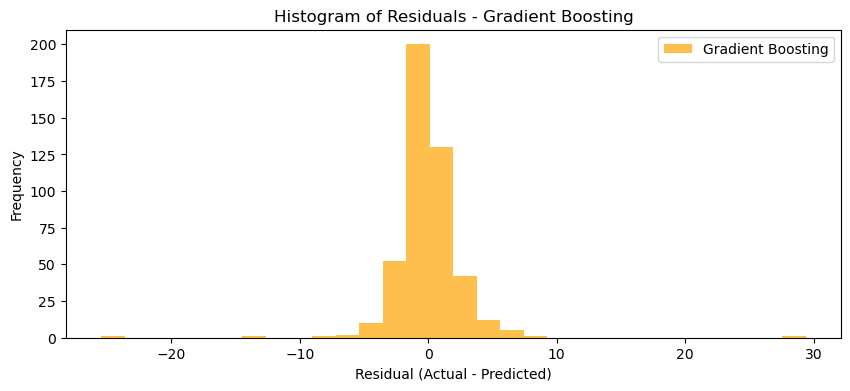

In [87]:
# Reuse previous variables
# Y_test_series, rf_preds, gbr_preds
rf_residuals = Y_test_series - rf_preds
gbr_residuals = Y_test_series - gbr_preds

# --- Histograms of Residuals ---

plt.figure(figsize=(10, 4))
plt.hist(rf_residuals, bins=30, color='blue', alpha=0.7, label='Random Forest')
plt.title('Histogram of Residuals - Random Forest')
plt.xlabel('Residual (Actual - Predicted)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

plt.figure(figsize=(10, 4))
plt.hist(gbr_residuals, bins=30, color='orange', alpha=0.7, label='Gradient Boosting')
plt.title('Histogram of Residuals - Gradient Boosting')
plt.xlabel('Residual (Actual - Predicted)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


## Model Evaluation

In [88]:
# --- Error Metrics ---
def evaluate_model(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f"\n{name} Evaluation:")
    print(f"R² Score : {r2:.4f}")
    print(f"MAE      : {mae:.4f}")
    print(f"MSE      : {mse:.4f}")
    print(f"RMSE     : {rmse:.4f}")

# Ensure Y_test is a proper Series
Y_test_series = pd.Series(Y_test).reset_index(drop=True)

# Evaluate Random Forest
evaluate_model("Random Forest", Y_test_series, test_predictions_rfr)

# Evaluate Gradient Boosting
evaluate_model("Gradient Boosting", Y_test_series, test_predictions_gbr)



Random Forest Evaluation:
R² Score : 0.9871
MAE      : 1.6849
MSE      : 7.0671
RMSE     : 2.6584

Gradient Boosting Evaluation:
R² Score : 0.9864
MAE      : 1.5446
MSE      : 7.4798
RMSE     : 2.7349
